<a href="https://colab.research.google.com/github/AsadBukhari886/foundations_of_artificial_neural_network/blob/main/Class_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

import matplotlib.pyplot as plt



In [ ]:

class0 = np.random.randn(250, 2) + np.array([2, 2])

class1 = np.random.randn(250, 2) + np.array([7, 7])

X = np.vstack([class0, class1]).astype(np.float32)
y = np.array([0]*250 + [1]*250, dtype=np.float32).reshape(-1, 1)

X_train = torch.from_numpy(X)
y_train = torch.from_numpy(y).view(-1, 1)


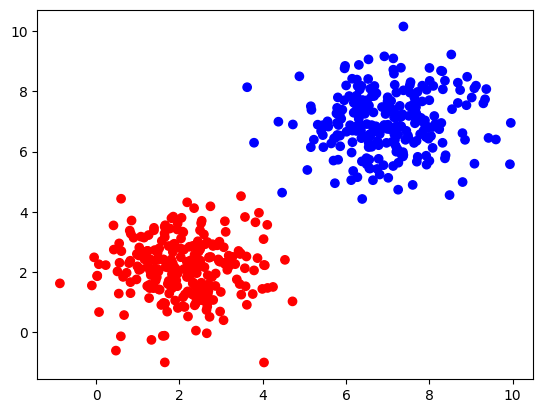

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr_r')

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Linear(2, 1)

  def forward(self, X):
    z = self.layer(X)
    y_hat = torch.sigmoid(z)
    return y_hat

model = Model()


In [ ]:
lf = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [ ]:
for i in range(1000):
  y_hat = model(X_train)
  loss = lf(y_hat, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  print(loss.item())

3.3404736518859863
1.1481519937515259
0.5007824301719666
0.4910293519496918
0.4870801866054535
0.48366788029670715
0.4803158640861511
0.4770016670227051
0.47372400760650635
0.47048234939575195
0.46727630496025085
0.464105486869812
0.4609694480895996
0.45786765217781067
0.4547998309135437
0.4517654776573181
0.4487641155719757
0.4457955062389374
0.44285914301872253
0.43995457887649536
0.4370814859867096
0.4342394471168518
0.43142804503440857
0.4286469519138336
0.42589569091796875
0.42317402362823486
0.420481413602829
0.417817622423172
0.4151822626590729
0.4125748574733734
0.4099951982498169
0.4074428677558899
0.40491750836372375
0.4024187922477722
0.3999464213848114
0.3974999487400055
0.3950791358947754
0.39268362522125244
0.390313059091568
0.38796719908714294
0.38564565777778625
0.38334810733795166
0.38107433915138245
0.3788239657878876
0.37659671902656555
0.3743922710418701
0.37221038341522217
0.3700507581233978
0.36791306734085083
0.3657970130443573
0.3637024164199829
0.36162894964218

In [ ]:
params = list(model.parameters())
w1 =params[0].data[0,0]
w2= params[0].data[0,1]
b = params[1].data[0]
print("W1:", w1)
print("W2:", w2)
print("b:", b)

W1: tensor(0.6870)
W2: tensor(0.6954)
b: tensor(-5.7833)


/tmp/ipython-input-4293987394.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  x2_val = - (w1* x1_val / w2 + b / w2)


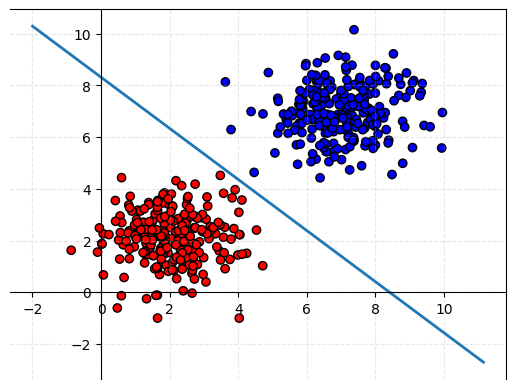

In [ ]:
x1_val = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100 )
x2_val = - (w1* x1_val / w2 + b / w2)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr_r', edgecolors='k')

plt.plot(x1_val, x2_val, linewidth=2)

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
plt.grid(True, linestyle='--', alpha=0.3)


In [ ]:
def sigmoid(z):
  return 1/ (1 + np.exp(-z))

def BCEloss(y_hat, y):
  eps = 1e-6
  return -np.mean(y* np.log(y_hat + eps)+ (1 - y)*np.log(1-y_hat+eps))

In [ ]:
X.shape[0]

500

In [ ]:
#neuron
W = np.random.randn(1,2)
b = 0

def forward(X):
  z = X @ W.T + b
  y_hat = sigmoid(z)
  return  y_hat

y_hat = forward(X)

In [ ]:
print(W)
print(b)

[[ 1.79840918 -0.76235341]]
0


In [ ]:
print(W)
print(b)

[[0.70461513 0.71574771]]
-5.960421099603407


In [ ]:
lr = 0.1

for i in range(1000):
  y_hat = forward(X)
  loss = BCEloss(y_hat, y)

  dL = (y_hat - y) / X.shape[0]
  dW = dL.T @ X
  db = np.sum(dL)

  W = W - lr * dW
  b = b -lr * db

  print(loss)


0.3143023664865499
0.3123709830698591
0.3104677332832917
0.30859201031080635
0.3067432206694234
0.304920784070303
0.303124133268635
0.30135271390336
0.2996059843276998
0.2978834154314337
0.29618449045581347
0.2945087048019704
0.2928555658336221
0.2912245926748489
0.2896153160036653
0.28802727784207255
0.2864600313432395
0.28491314057641864
0.2833861803101662
0.28187873579439904
0.28039040254178543
0.2789207861089295
0.27746950187778086
0.2760361748376613
0.2746204393682778
0.27322193902405395
0.27184032632008864
0.2704752625200207
0.2691264174260548
0.26779346917137686
0.2664761040151666
0.2651740161403905
0.2638869074545397
0.2626144873934565
0.2613564727283756
0.26011258737628795
0.25888256221372064
0.25766613489400964
0.2564630496681288
0.2552730572091254
0.2540959144402016
0.25293138436646667
0.2517792359103799
0.25063924375088853
0.24951118816626155
0.24839485488060892
0.24729003491407026
0.2461965244366493
0.24511412462566626
0.2440426415267915
0.24298188591862419
0.2419316731807

(500, 1)

In [ ]:
y.shape

(500,)

In [ ]:
b

np.float64(-5.644942323598341)

In [ ]:


x1_val = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100 )
x2_val = - (W[0]* x1_val / W[1] + b / W[1])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr_r', edgecolors='k')

plt.plot(x1_val, x2_val, linewidth=2)

ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
plt.grid(True, linestyle='--', alpha=0.3)


ValueError: operands could not be broadcast together with shapes (2,) (100,) 